In [1]:
import os
import json

In [2]:
base_path = os.getcwd()
data_file_path = os.path.join(base_path, '20200607_data.json')

with open(data_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [21]:
# 各 Category 分佈
cat_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}

for d in more_data:
    cat_count[d['Category']] += 1
    
cat_count

{0: 8360, 1: 10652, 2: 9730, 3: 8385}

In [4]:
# 複製資料

more_data = []

d0 = []
d1 = []
d2 = []
d3 = []

for d in data:
    if d['Category'] == 0:
        d0.append(d)
    elif d['Category'] == 1:
        d1.append(d)
    elif d['Category'] == 2:
        d2.append(d)
    elif d['Category'] == 3:
        d3.append(d)
        
more_data = d0 + 2*d1 + 10*d2 + 13*d3
len(more_data)

37127

In [5]:
# 讓各category平均一點

avg_data = []
threshold_count = 645
cat_count = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}

for d in data:
    if cat_count[d['Category']] < threshold_count:
        avg_data.append(d)
        cat_count[d['Category']] += 1

# sklearn

In [6]:
text = []
label = []

for d in more_data:
    text.append(d['Token'])
    label.append(d['Category'])

In [7]:
from sklearn import model_selection

# split the dataset into training and testing 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(text, label, test_size=0.1, random_state=1)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(train_x) # Learn vocabulary and idf from training data set. (in bad words)
xtrain_tfidf = tfidf_vect.transform(train_x) # compute tfidf for tranning data set
xvalid_tfidf = tfidf_vect.transform(valid_x) # compute tfidf for testing data set

In [152]:
# Display bag words
# print(tfidf_vect.get_feature_names())

## tree

In [35]:
from sklearn import tree,  metrics

classifier_tree = tree.DecisionTreeClassifier(random_state=1)
# fit the training dataset on the classifier
classifier_tree =classifier_tree.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_tree = classifier_tree.predict(xvalid_tfidf)
accuracy_tree = metrics.accuracy_score(valid_y, valid_y_pred_tree)
confusion_matrix_tree = metrics.confusion_matrix(valid_y, valid_y_pred_tree, labels=[0,1,2,3])

print ("Accuracy", accuracy_tree)
print ("confusion_matrix\n", confusion_matrix_tree)

Accuracy 0.858066253703205
confusion_matrix
 [[439 334  61  38]
 [ 49 992   8   7]
 [  0   2 937  25]
 [  0   0   3 818]]


In [36]:
print("precision for class 1", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=0, average='macro'))
print("precision for class 2", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=1, average='macro'))
print("precision for class 3", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=2, average='macro'))
print("precision for class 4", metrics.precision_score(valid_y, valid_y_pred_tree, pos_label=3, average='macro'))

# print("recall for class Negative", metrics.recall_score(valid_y, valid_y_pred_tree, pos_label=0))
# print("recall for class Positive", metrics.recall_score(valid_y, valid_y_pred_tree, pos_label=1))    

precision for class 1 0.874097876733162
precision for class 2 0.874097876733162
precision for class 3 0.874097876733162
precision for class 4 0.874097876733162


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1317: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


[Text(1618.1999999999998, 1630.8, '未滿 <= 0.247\ngini = 0.747\nsamples = 33414\nvalue = [7488, 9596, 8766, 7564]\nclass = 1'),
 Text(892.8, 1268.4, '整體 <= 0.025\ngini = 0.746\nsamples = 32519\nvalue = [7476, 9585, 8463, 6995]\nclass = 1'),
 Text(446.4, 906.0, '倒掉 <= 0.077\ngini = 0.747\nsamples = 28625\nvalue = [6180, 7974, 7745, 6726]\nclass = 1'),
 Text(223.2, 543.6000000000001, '東西 <= 0.055\ngini = 0.747\nsamples = 28046\nvalue = [6172, 7948, 7615, 6311]\nclass = 1'),
 Text(111.6, 181.20000000000005, '\n  (...)  \n'),
 Text(334.79999999999995, 181.20000000000005, '\n  (...)  \n'),
 Text(669.5999999999999, 543.6000000000001, '一陣子 <= 0.074\ngini = 0.434\nsamples = 579\nvalue = [8, 26, 130, 415]\nclass = 3'),
 Text(558.0, 181.20000000000005, '\n  (...)  \n'),
 Text(781.1999999999999, 181.20000000000005, '\n  (...)  \n'),
 Text(1339.1999999999998, 906.0, '開動 <= 0.024\ngini = 0.679\nsamples = 3894\nvalue = [1296, 1611, 718, 269]\nclass = 1'),
 Text(1116.0, 543.6000000000001, '難喝 <= 0.173\

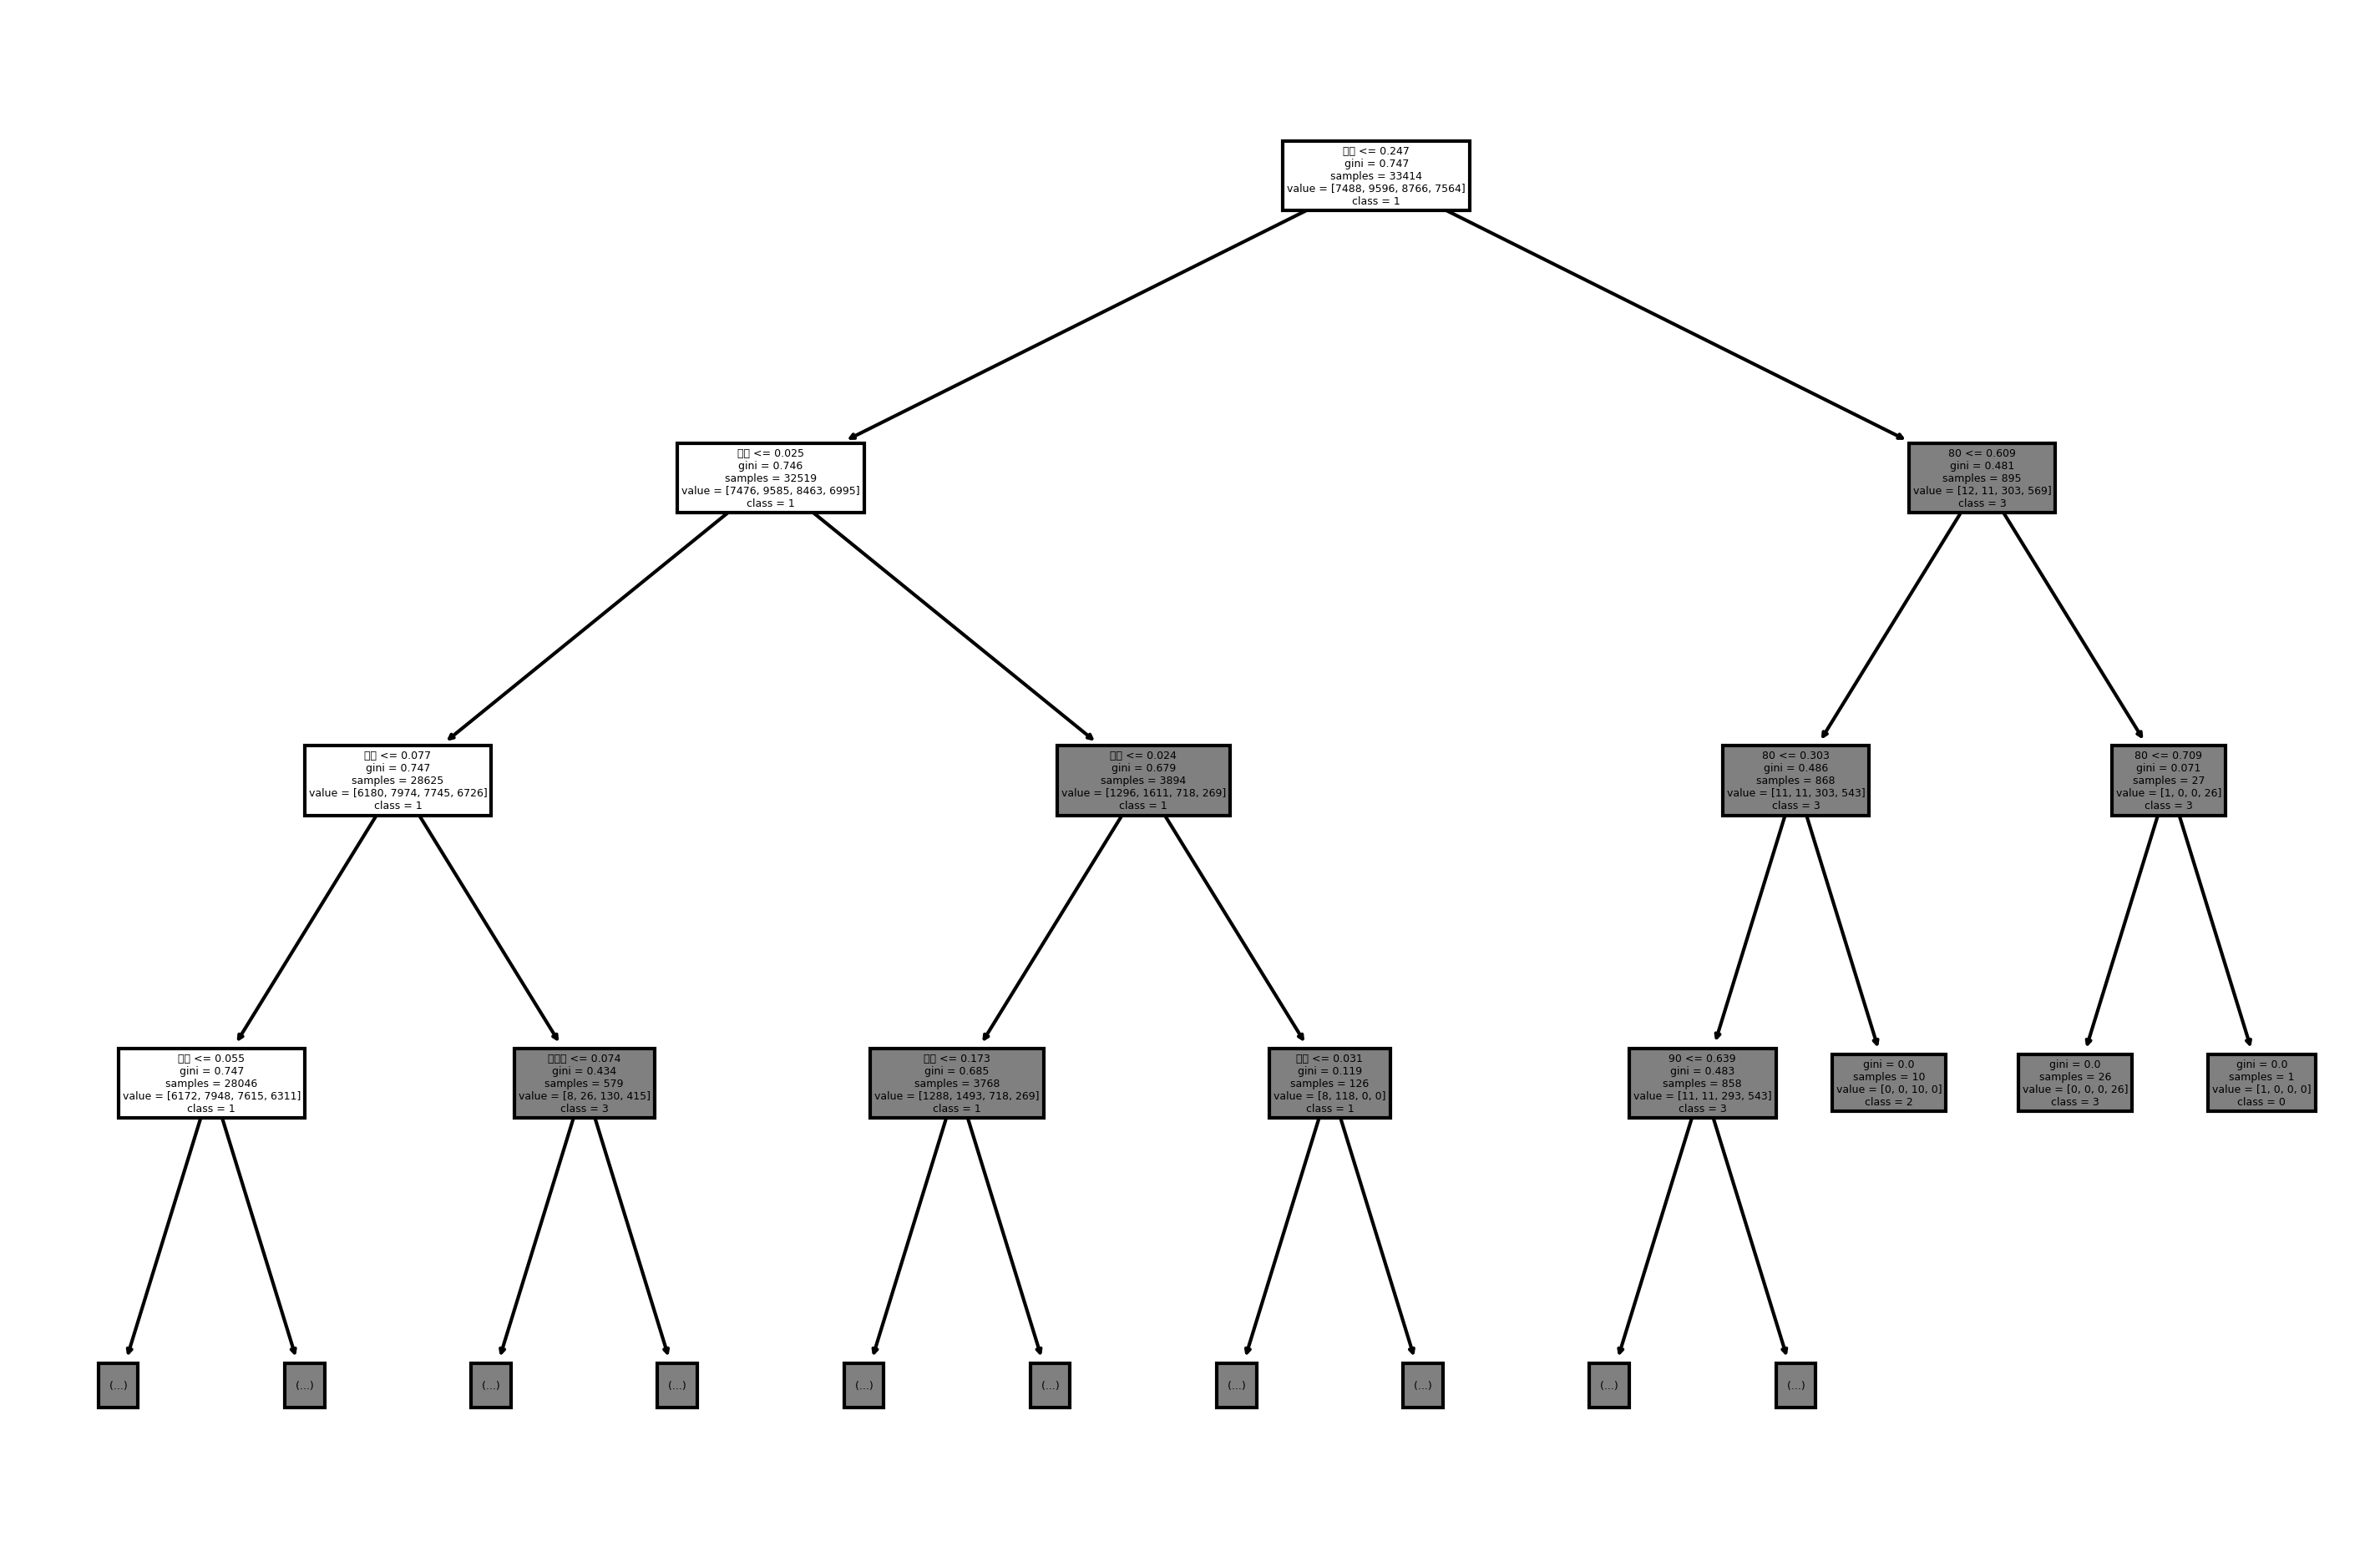

In [38]:
import matplotlib.pyplot as plt
plt.figure( figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
tree.plot_tree(classifier_tree, max_depth=3, feature_names=tfidf_vect.get_feature_names(), class_names=['0','1','2','3'])


## Random Forest

In [44]:
from sklearn import ensemble

classifier_rf = ensemble.RandomForestClassifier(random_state= 1)
# fit the training dataset on the classifier
classifier_rf.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_rf = classifier_rf.predict(xvalid_tfidf)

accuracy_rf = metrics.accuracy_score(valid_y, valid_y_pred_rf)
confusion_matrix_rf = metrics.confusion_matrix(valid_y, valid_y_pred_rf, labels=[0,1,2,3])
print ("Accuracy", accuracy_rf)
print ("confusion_matrix\n", confusion_matrix_rf)

Accuracy 0.894155669270132
confusion_matrix
 [[ 537  332    0    3]
 [  30 1025    0    1]
 [   0    2  937   25]
 [   0    0    0  821]]


## Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier

classifier_nn = MLPClassifier(hidden_layer_sizes=(5,), random_state=1)

# fit the training dataset on the classifier
classifier_nn.fit(xtrain_tfidf, train_y)

# predict the labels on validation dataset
valid_y_pred_nn = classifier_nn.predict(xvalid_tfidf)

accuracy_nn = metrics.accuracy_score(valid_y, valid_y_pred_nn)
confusion_matrix_nn = metrics.confusion_matrix(valid_y, valid_y_pred_nn, labels=[0,1,2,3])

print ("Accuracy", accuracy_nn)
print ("confusion_matrix\n", confusion_matrix_nn)

Accuracy 0.8674925935900889
confusion_matrix
 [[528 274  49  21]
 [102 937  12   5]
 [  0   2 935  27]
 [  0   0   0 821]]


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Keras

In [46]:
text = []
label = []

for d in more_data:
    text.append(d['Token'])
    label.append(d['Category'])

In [58]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

max_words = 1000

# 建立token
token = Tokenizer(num_words=max_words)
# token.fit_on_texts(text)
token.fit_on_texts(train_x)

In [151]:
print(token.document_count)
# print(token.word_index)

33414


In [60]:
max_len = 30

text_seq = token.texts_to_sequences(train_x) # 把text轉為數字list
train_text = sequence.pad_sequences(text_seq, maxlen=max_len) # 讓每筆list長度都一樣

In [61]:
# one-hot encoding mark
from keras.utils import np_utils

label_oneHot = np_utils.to_categorical(train_y)
print(label_oneHot)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [62]:
# model

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

def LSTMClassifier():
    model = Sequential()
    model.add(Embedding(output_dim=10, input_dim=max_words, input_length=max_len))
    model.add(LSTM(32))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=4, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [63]:
model = LSTMClassifier()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 10)            10000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                5504      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 36,756
Trainable params: 36,756
Non-trainable params: 0
__________________________________________________

In [64]:
# 開始訓練
# 打散資料: shuffle=True,
train_history = model.fit(train_text, label_oneHot, batch_size=256, epochs=50, verbose=2, shuffle=True, validation_split=0.1)

Train on 30072 samples, validate on 3342 samples
Epoch 1/50
 - 14s - loss: 0.5204 - accuracy: 0.7571 - val_loss: 0.4746 - val_accuracy: 0.7700
Epoch 2/50
 - 13s - loss: 0.4497 - accuracy: 0.7809 - val_loss: 0.4353 - val_accuracy: 0.7908
Epoch 3/50
 - 14s - loss: 0.4095 - accuracy: 0.8059 - val_loss: 0.4124 - val_accuracy: 0.8048
Epoch 4/50
 - 13s - loss: 0.3760 - accuracy: 0.8263 - val_loss: 0.3962 - val_accuracy: 0.8127
Epoch 5/50
 - 14s - loss: 0.3519 - accuracy: 0.8396 - val_loss: 0.3611 - val_accuracy: 0.8391
Epoch 6/50
 - 12s - loss: 0.3337 - accuracy: 0.8487 - val_loss: 0.3734 - val_accuracy: 0.8309
Epoch 7/50
 - 12s - loss: 0.3189 - accuracy: 0.8563 - val_loss: 0.3346 - val_accuracy: 0.8514
Epoch 8/50
 - 13s - loss: 0.3029 - accuracy: 0.8626 - val_loss: 0.3197 - val_accuracy: 0.8576
Epoch 9/50
 - 13s - loss: 0.2873 - accuracy: 0.8706 - val_loss: 0.3058 - val_accuracy: 0.8642
Epoch 10/50
 - 13s - loss: 0.2727 - accuracy: 0.8762 - val_loss: 0.2989 - val_accuracy: 0.8676
Epoch 11/5

In [65]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

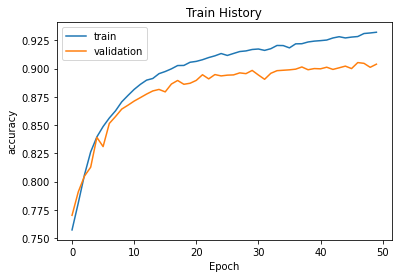

In [66]:
# 畫出accuracy執行結果
show_train_history(train_history, 'accuracy', 'val_accuracy')

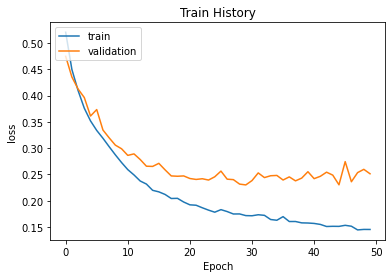

In [67]:
# 畫出loss誤差執行結果
show_train_history(train_history, 'loss', 'val_loss')

In [76]:
valid_text_seq = token.texts_to_sequences(valid_x)
valid_text = sequence.pad_sequences(valid_text_seq, maxlen=max_len)

valid_label_oneHot = np_utils.to_categorical(valid_y)

scores = model.evaluate(valid_text, valid_label_oneHot)
print('Accuracy:', scores[1])

3713/3713 [==============================] - 1s 317us/step
Accuracy: 0.8975895643234253


In [94]:
import numpy as np

valid_y_array = np.array(valid_y)

In [95]:
import pandas as pd

predictions = model.predict_classes(valid_text)
pd.crosstab(valid_y_array, predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3
label,,,,
0,404,370,63,35
1,206,803,27,20
2,3,11,920,30
3,0,2,0,819


In [148]:
from diglett.preprocessor import text_preprocessor as textpre

def preprocess_comment(comment):
    ws_doc_list = textpre.ckip_tokenize([comment])
    ws_doc_list = textpre.remove_stopwords(ws_doc_list)
    ws_doc_list = textpre.pos_tag(ws_doc_list)
    tokens = ' '.join(ws_doc_list[0])
    
    text_seq = token.texts_to_sequences([tokens])
    text = sequence.pad_sequences(text_seq, maxlen=max_len)
    return text

In [149]:
comment = '''
大小適中，而且熱量只有282
通常都被我當成下班後運動前的正餐食用
雖然是微波食品但該有的都有
烤雞腿排
半融起士
綠花椰菜
外皮的麵包很像是有先加乳酪絲烘烤過
即使微波後吃起來口感還是很好
有彈性也不會太乾
吃一顆當晚餐不會太飽太負擔
接著去健身房運動剛剛好、很推！
'''
comment = preprocess_comment(comment)
pred_class = model.predict_classes(comment)

print('預測為類別:', pred_class[0])

預測為類別: 0


In [150]:
comment = '''
昨天想說晚上宵夜就吃泡麵好了
就去附近的便利商店挑選口味
當然泡麵區很多品項
我就看到了以下這包
黑色的包裝感覺就是很不一樣
而且在泡麵區完全就是很突兀
拿起來看後面說明寫著
韓國馬鈴薯拉麵(龍蝦風味)
想說沒吃過買看看好了 去結帳的時候1xx元
也沒想很多就直接付錢了

到了宵夜時段
迫不及待的想趕快嚐嚐
於是煮好之後嚐了一口
我完全是非常傻眼的看著那鍋麵
然後再翻一個超大的白眼

它吃起來就跟辛拉麵的味道一模一樣！
啊說好的龍蝦風味呢?...

這完全是我吃過所有泡麵裡最貴也最雷的
也發誓以後絕對不會再買沒吃過的泡麵了
'''
comment = preprocess_comment(comment)
pred_class = model.predict_classes(comment)

print('預測為類別:', pred_class[0])

預測為類別: 3
